In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [3]:
# dataframe 'cust' is created containing all the customer information
cust = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
cust.info()   # Concise summary about the dataframeb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
cust.shape  # returns dimension of the dataframe

(7043, 21)

## Data Cleaning

Since, 'TotalCharges' is an object data type, we will have to change its data type to numeric data type.

In [6]:
cust.TotalCharges.dtype

dtype('O')

#### On investigation, we found out that feature 'TotalCharges' has few blank values

In [7]:
cust[cust.TotalCharges == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
# Replacing blanks with NaN
cust.TotalCharges = cust.TotalCharges.replace(r'\s+', np.nan, regex=True)

In [9]:
# Rows with NaN values
null_data = cust[cust.isnull().any(axis=1)]
null_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
# Converting data type from object to float64
cust.TotalCharges = cust.TotalCharges.astype('float64')
cust.TotalCharges.dtype

dtype('float64')

In [11]:
# Dropping rows with NaN values
cust = cust.dropna()

### Categorical feature levels

In [12]:
cust.gender.unique()

array(['Female', 'Male'], dtype=object)

In [13]:
cust.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [14]:
cust.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [15]:
cust.Dependents.unique()

array(['No', 'Yes'], dtype=object)

In [16]:
cust.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [17]:
cust.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [18]:
cust.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [19]:
cust.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [20]:
cust.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [21]:
cust.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [22]:
cust.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
cust.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [24]:
cust.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [25]:
cust.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [26]:
cust.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

In [27]:
cust.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

### Exploratory Data Analysis

#### Correlation among numeric attributes

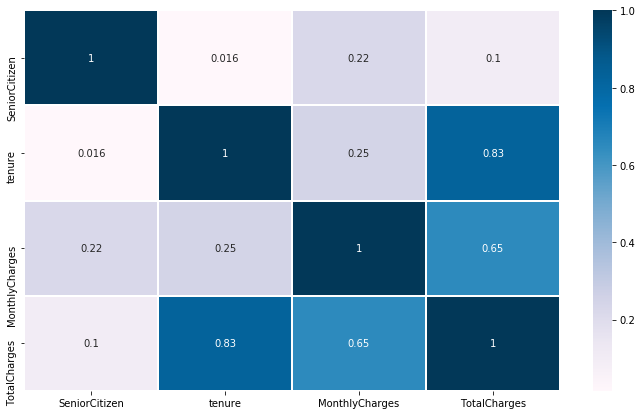

In [28]:
fig, ax  = plt.subplots(figsize=(12, 7))
sns.heatmap(cust.corr(),cmap = 'PuBu',linecolor='white',linewidths=1,annot = True)

##### 'tenure' and 'TotalCharges' have high correlation 

C:\Users\Strea\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Subscribers by Gender')

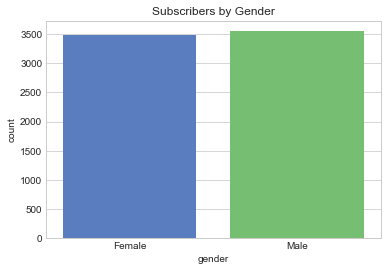

In [29]:
# Almost equal number of male and female have availed the telecom service
sns.set_style('whitegrid')
sns.countplot(x='gender',data=cust, palette='muted').set_title('Subscribers by Gender')

C:\Users\Strea\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Churn by Gender')

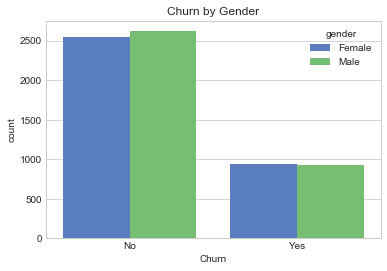

In [30]:
# Roughly 40% of the female and male subscribers have churned
sns.countplot(x='Churn',hue='gender',data=cust,palette='muted').set_title('Churn by Gender')

C:\Users\Strea\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Total Charges distribution by Gender & Churn')

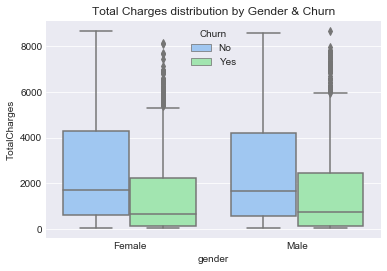

In [31]:
# Customers who have churned have lesser median total charge amount than the Customers who haven't churned
sns.set_style('darkgrid')
sns.boxplot(x='gender', y='TotalCharges', hue='Churn', data=cust, palette='pastel').set_title('Total Charges distribution by Gender & Churn')

C:\Users\Strea\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Monthly Charges distribution by Gender & Churn')

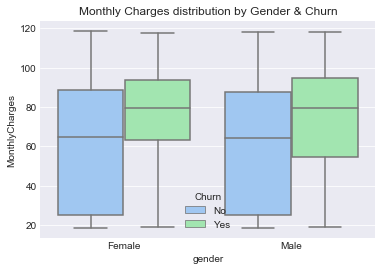

In [32]:
# Customers who have churned have higher median monthly charge amount than the Customers who haven't churned
sns.set_style('darkgrid')
sns.boxplot(x='gender', y='MonthlyCharges', hue='Churn', data=cust, palette='pastel').set_title('Monthly Charges distribution by Gender & Churn')

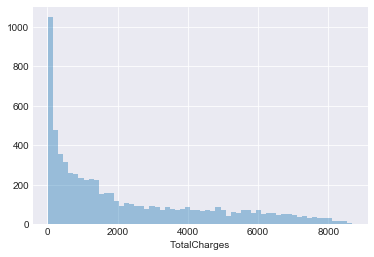

In [33]:
# Total Charges distribution
sns.set_style('darkgrid')
sns.distplot(cust['TotalCharges'],kde=False,bins=60)

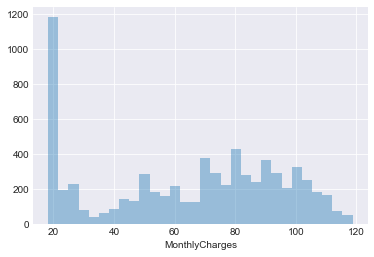

In [34]:
# Monthly Charges distribution
sns.set_style('darkgrid')
sns.distplot(cust['MonthlyCharges'],kde=False,bins=30)

C:\Users\Strea\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Churn by Senior Citizen')

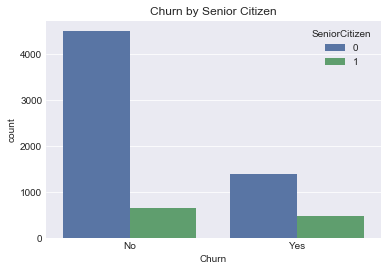

In [35]:
# Senior Citizens are less likely to churn as compared to their younger counterparts
sns.set_style('darkgrid')
sns.countplot(x='Churn',hue='SeniorCitizen',data=cust,palette='deep').set_title('Churn by Senior Citizen')

C:\Users\Strea\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Churn by Dependents')

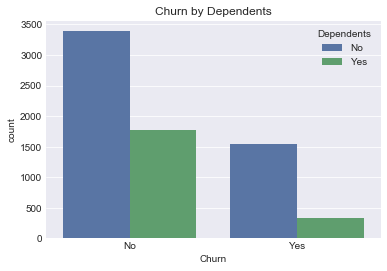

In [36]:
# People without dependents are more likely to churn
sns.countplot(x='Churn',hue='Dependents',data=cust,palette='deep').set_title('Churn by Dependents')

C:\Users\Strea\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Churn by Payment Method')

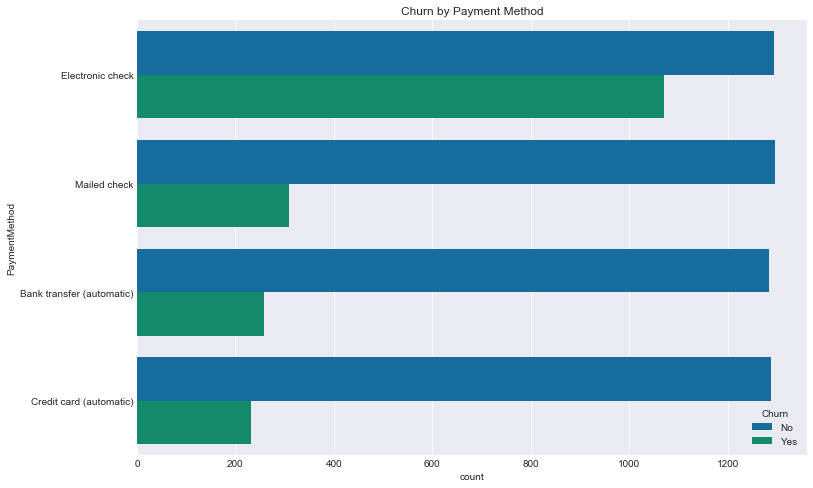

In [37]:
# People paying their bill through Electronic check churn the most
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.countplot(y='PaymentMethod', hue='Churn', data=cust, palette='colorblind').set_title('Churn by Payment Method')

C:\Users\Strea\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Churn by Multiple Service')

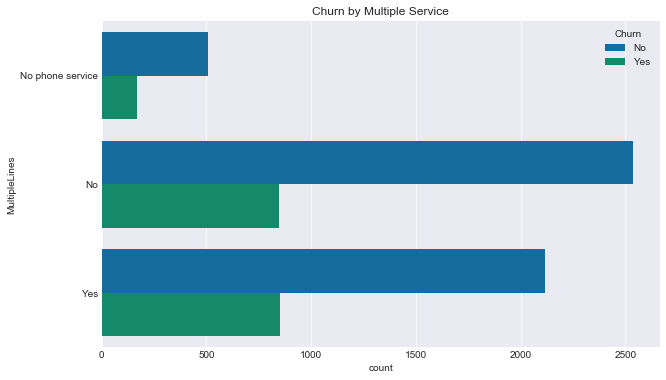

In [38]:
# Churn is highest among subscribers with multiple line service
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.countplot(y='MultipleLines', hue='Churn', data=cust, palette='colorblind').set_title('Churn by Multiple Service')

C:\Users\Strea\Anaconda3\lib\site-packages\seaborn\categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
C:\Users\Strea\Anaconda3\lib\site-packages\seaborn\categorical.py:942: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


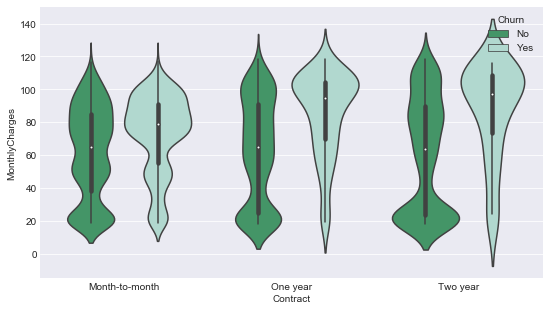

In [39]:
# For each contract, customer with higher monthly charges have churned the most
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)
sns.set_style('darkgrid')
sns.violinplot(x='Contract', y='MonthlyCharges', data=cust,hue='Churn',palette='BuGn_r')

C:\Users\Strea\Anaconda3\lib\site-packages\seaborn\categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
C:\Users\Strea\Anaconda3\lib\site-packages\seaborn\categorical.py:942: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


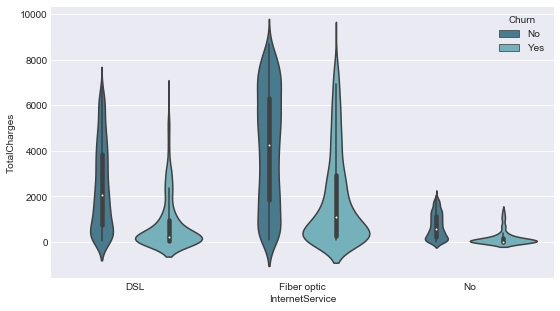

In [40]:
# Depending on the internet service, customer with lower total charge have churned the most
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)
sns.set_style('darkgrid')
sns.violinplot(x='InternetService', y='TotalCharges', data=cust,hue='Churn',palette='GnBu_d')

### Converting Categorical variables to dummy variables

In [41]:
Gender = pd.get_dummies(cust['gender'],prefix='gender',drop_first=True)
partner = pd.get_dummies(cust['Partner'],prefix='partner',drop_first=True)
dependents = pd.get_dummies(cust['Dependents'],prefix='dep',drop_first=True)
p_service = pd.get_dummies(cust['PhoneService'],prefix='phone_serv',drop_first=True)
m_lines = pd.get_dummies(cust['MultipleLines'],prefix='multiple',drop_first=True)
internet = pd.get_dummies(cust['InternetService'],prefix='internet',drop_first=True)
o_security = pd.get_dummies(cust['OnlineSecurity'],prefix='onlinesec',drop_first=True)
o_backup = pd.get_dummies(cust['OnlineBackup'],prefix='onlineback',drop_first=True)
d_protection = pd.get_dummies(cust['DeviceProtection'],prefix='devprotect',drop_first=True)
t_support = pd.get_dummies(cust['TechSupport'],prefix='techsup',drop_first=True)
s_tv = pd.get_dummies(cust['StreamingTV'],prefix='streamTV',drop_first=True)
s_movies = pd.get_dummies(cust['StreamingMovies'],prefix='streamMov',drop_first=True)
contract = pd.get_dummies(cust['Contract'],prefix='contract',drop_first=True)
pless_bill = pd.get_dummies(cust['PaperlessBilling'],prefix='plessbill',drop_first=True)
p_method = pd.get_dummies(cust['PaymentMethod'],prefix='paymethod',drop_first=True)

In [42]:
cust.drop(['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
           'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
           'Contract','PaperlessBilling','PaymentMethod'],axis=1,inplace=True)

In [43]:
cust = pd.concat([cust,Gender,partner,dependents,p_service,m_lines,internet,o_security,o_backup,
                  d_protection,t_support,s_tv,s_movies,contract,pless_bill,p_method],axis=1)

In [44]:
cust.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,partner_Yes,dep_Yes,phone_serv_Yes,multiple_No phone service,...,streamTV_No internet service,streamTV_Yes,streamMov_No internet service,streamMov_Yes,contract_One year,contract_Two year,plessbill_Yes,paymethod_Credit card (automatic),paymethod_Electronic check,paymethod_Mailed check
0,0,1,29.85,29.85,No,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,No,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,Yes,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,No,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,Yes,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [45]:
cust.Churn.unique()

array(['No', 'Yes'], dtype=object)

#### Replacing Churn values 'Yes' and 'No' with 1 and 0 respectively

In [46]:
cust.Churn = cust.Churn.replace('Yes',1)
cust.Churn = cust.Churn.replace('No',0)
cust.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,partner_Yes,dep_Yes,phone_serv_Yes,multiple_No phone service,...,streamTV_No internet service,streamTV_Yes,streamMov_No internet service,streamMov_Yes,contract_One year,contract_Two year,plessbill_Yes,paymethod_Credit card (automatic),paymethod_Electronic check,paymethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [47]:
cust.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'partner_Yes', 'dep_Yes', 'phone_serv_Yes',
       'multiple_No phone service', 'multiple_Yes', 'internet_Fiber optic',
       'internet_No', 'onlinesec_No internet service', 'onlinesec_Yes',
       'onlineback_No internet service', 'onlineback_Yes',
       'devprotect_No internet service', 'devprotect_Yes',
       'techsup_No internet service', 'techsup_Yes',
       'streamTV_No internet service', 'streamTV_Yes',
       'streamMov_No internet service', 'streamMov_Yes', 'contract_One year',
       'contract_Two year', 'plessbill_Yes',
       'paymethod_Credit card (automatic)', 'paymethod_Electronic check',
       'paymethod_Mailed check'],
      dtype='object')

### Selecting top 24 features using feature ranking with recursive feature elimination method

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 24)
rfe = rfe.fit(cust.drop('Churn',axis=1), cust.Churn)

print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False False  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True False]
[1 1 5 7 2 6 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 3]


In [49]:
X = cust.drop('Churn',axis=1)
rfe.transform(X)
X.columns[rfe.get_support(indices=True)].tolist()

['SeniorCitizen',
 'tenure',
 'dep_Yes',
 'phone_serv_Yes',
 'multiple_No phone service',
 'multiple_Yes',
 'internet_Fiber optic',
 'internet_No',
 'onlinesec_No internet service',
 'onlinesec_Yes',
 'onlineback_No internet service',
 'onlineback_Yes',
 'devprotect_No internet service',
 'techsup_No internet service',
 'techsup_Yes',
 'streamTV_No internet service',
 'streamTV_Yes',
 'streamMov_No internet service',
 'streamMov_Yes',
 'contract_One year',
 'contract_Two year',
 'plessbill_Yes',
 'paymethod_Credit card (automatic)',
 'paymethod_Electronic check']

### Splitting the data into predictor variables and target variable

In [50]:
feature = ['SeniorCitizen',
 'tenure',
 'dep_Yes',
 'phone_serv_Yes',
 'multiple_No phone service',
 'multiple_Yes',
 'internet_Fiber optic',
 'internet_No',
 'onlinesec_No internet service',
 'onlinesec_Yes',
 'onlineback_No internet service',
 'onlineback_Yes',
 'devprotect_No internet service',
 'techsup_No internet service',
 'techsup_Yes',
 'streamTV_No internet service',
 'streamTV_Yes',
 'streamMov_No internet service',
 'streamMov_Yes',
 'contract_One year',
 'contract_Two year',
 'plessbill_Yes',
 'paymethod_Credit card (automatic)',
 'paymethod_Electronic check']
X = cust[feature]
X.head()

,SeniorCitizen,tenure,dep_Yes,phone_serv_Yes,multiple_No phone service,multiple_Yes,internet_Fiber optic,internet_No,onlinesec_No internet service,onlinesec_Yes,...,techsup_Yes,streamTV_No internet service,streamTV_Yes,streamMov_No internet service,streamMov_Yes,contract_One year,contract_Two year,plessbill_Yes,paymethod_Credit card (automatic),paymethod_Electronic check
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,34,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,2,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,45,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,2,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [51]:
y = cust['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

### Building Logistic Regression model

### Train Test Split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=123)

### Training

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Accuracy

In [54]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.81
Accuracy of Logistic regression classifier on test set: 0.80


### Prediction

In [55]:
predictions = logreg.predict(X_test)

### Precision, Recall, F1-score and Support

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.83      0.91      0.87      1484
          1       0.73      0.54      0.62       626

avg / total       0.80      0.80      0.80      2110



#### Interpretation
##### 80% of customers predicted as having churned actually had churned. 
##### Also, 80% of customers who have actually churned were predicted as churned.

### Cross validation

In [57]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=123)
logi = LogisticRegression()
scores = model_selection.cross_val_score(logi, X_train, y_train, cv=kfold, scoring='accuracy')
print("10-fold cross validation average accuracy: %.3f" % (scores.mean()))

10-fold cross validation average accuracy: 0.805


### ROC Curve

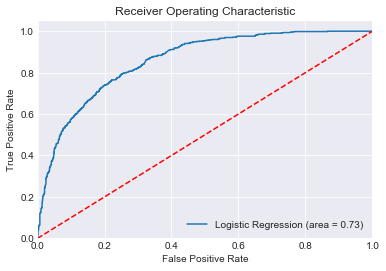

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##### From the ROC curve, we can say that the model is good as the ROC of the model is at a considerable margin away from the random classifier curve